# PMR3508-2024-70

Classification of Adult Database (from Kaggle) using k-Nearest Neighbor (kNN)

This Notebook is divided in the following sections:
1. Exploratory Analysis
2. Classifier Development

First, we import the libraries that we're going to use

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Then, we import the Adult dataset into a Pandas DataFrame.

In [340]:
df = pd.read_csv('data/train_data.csv')
df.set_index('Id', inplace=True)
print()

## 1. Exploratory Analysis

### 1.1 Data Understanding

In this subsection, we take a first look at the dataset to gain some insights of the data.


In [341]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [342]:
df.shape

(32560, 15)

In [343]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Objects type are strings that have to be processed with one-hot encoding so we can use it to train our models.

To get a quick overview of some statistics of the numerical features of our dataframe, we use the describe method.

In [344]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 1.2 Data Preparation
- Rename columns
- Drop irrelevant columns and rows
- Identify duplicated rows

First, we rename the columns for better visualization

In [345]:
df.rename(columns={'age': 'Age',
                   'workclass': 'Workclass',
                   'fnlwgt': 'Final Weight',
                   'education': 'Education',
                   'education.num': 'Education Number',
                   'marital.status': 'Marital Status',
                   'occupation': 'Occupation',
                   'relationship': 'Relationship',
                   'race': 'Race',
                   'sex': 'Sex',
                   'capital.gain': 'Capital Gain',
                   'capital.loss': 'Capital Loss',
                   'hours.per.week': 'Hours per Week',
                   'native.country': 'Native Country',
                   'income': 'Target'
                   }, inplace=True)
df.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Target
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


Now we remove rows with missing data

In [346]:
df.replace("?", np.nan, inplace=True)

In [347]:
df.isna().sum()

Age                    0
Workclass           1836
Final Weight           0
Education              0
Education Number       0
Marital Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital Gain           0
Capital Loss           0
Hours per Week         0
Native Country       583
Target                 0
dtype: int64

In [348]:
df = df.dropna()
df.shape

(30161, 15)

Now we identify duplicated rows

In [349]:
df.duplicated().sum()

23

Each row represents a person and it is possible that two people have the same census data, however this is unlikely to happen. So we'll choose to exclude this duplicated data.

In [350]:
df.drop_duplicates(inplace=True)
df.duplicated().sum() # to verify if duplicated values were excluded

0

### 1.3 Feature Understanding

Plot of features distributions to gain more insights. We'll start with personal-related features.

In [351]:
df.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Target
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


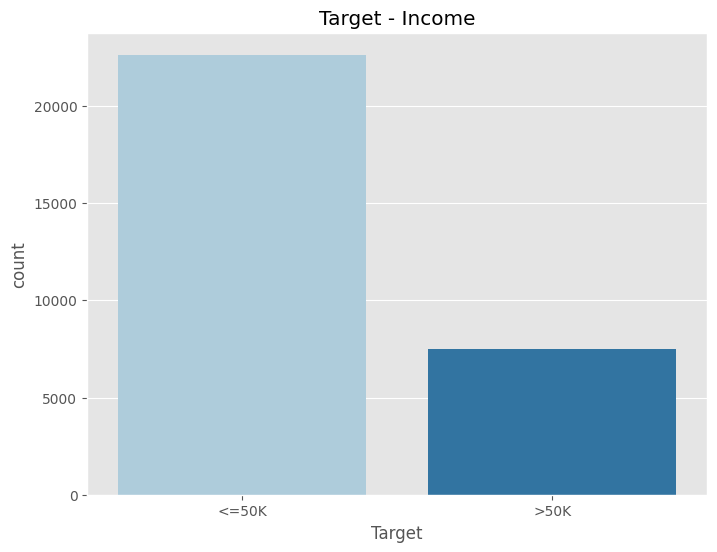

In [352]:
# Target: Income
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Target', palette='Paired')
plt.title('Target - Income')
plt.show()

In [353]:
# Proportion between above 50K / below 50K
df['Target'].value_counts().iloc[0]/df['Target'].value_counts().iloc[1]

3.015187849720224

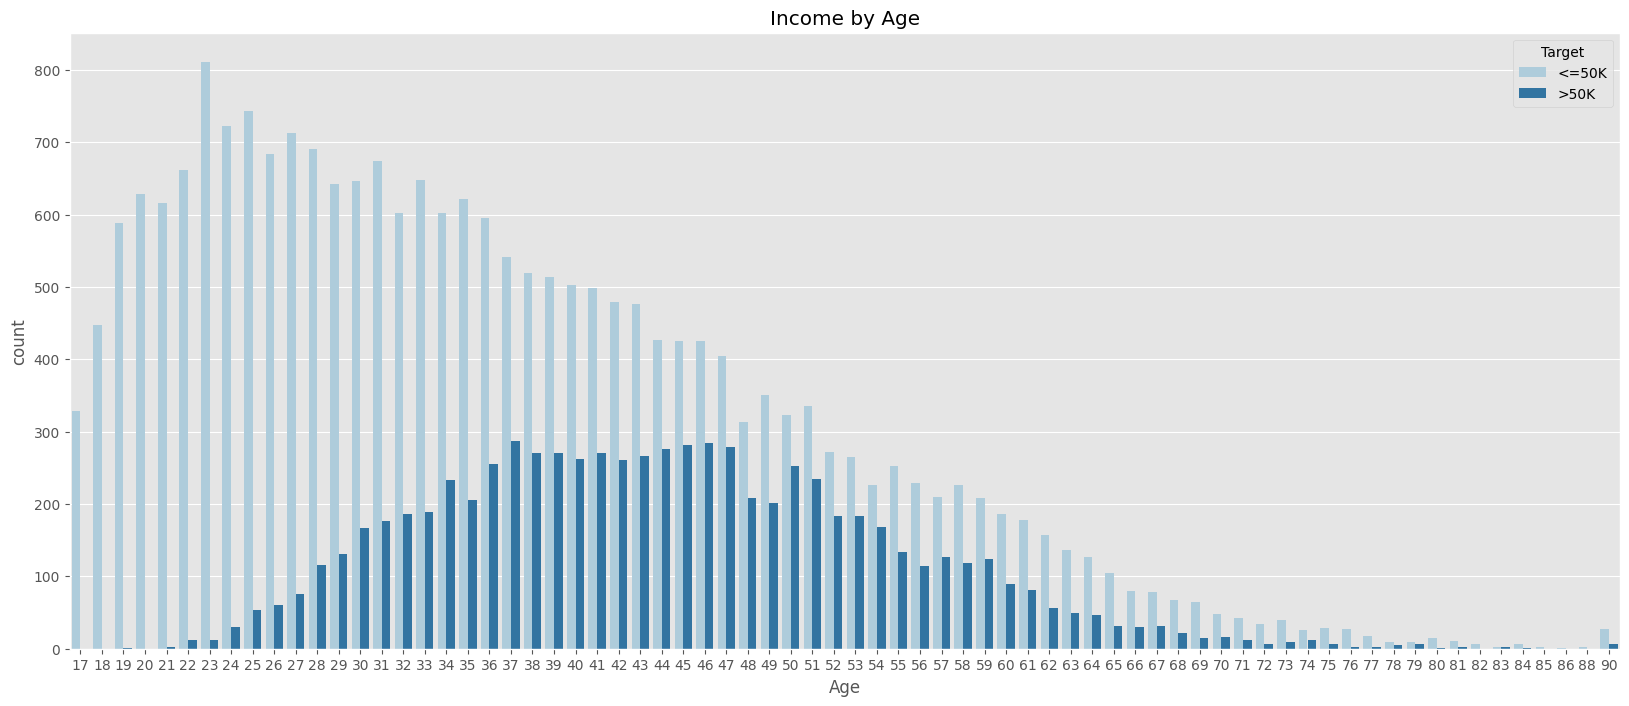

In [354]:
# Feature: Age
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='Age', hue='Target', palette='Paired')
plt.title('Income by Age')
plt.show()

In [355]:
# Calculate the mean age for each income group (Target)
mean_age_per_target = df.groupby('Target')['Age'].mean().reset_index()

# Rename the 'Age' column to 'Avg Age'
mean_age_per_target = mean_age_per_target.rename(columns={'Age': 'Avg Age'})

# Display the result
print(mean_age_per_target)


  Target    Avg Age
0  <=50K  36.611479
1   >50K  43.960165


In [356]:
df['Native Country'].value_counts()

Native Country
United-States                 27486
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador      

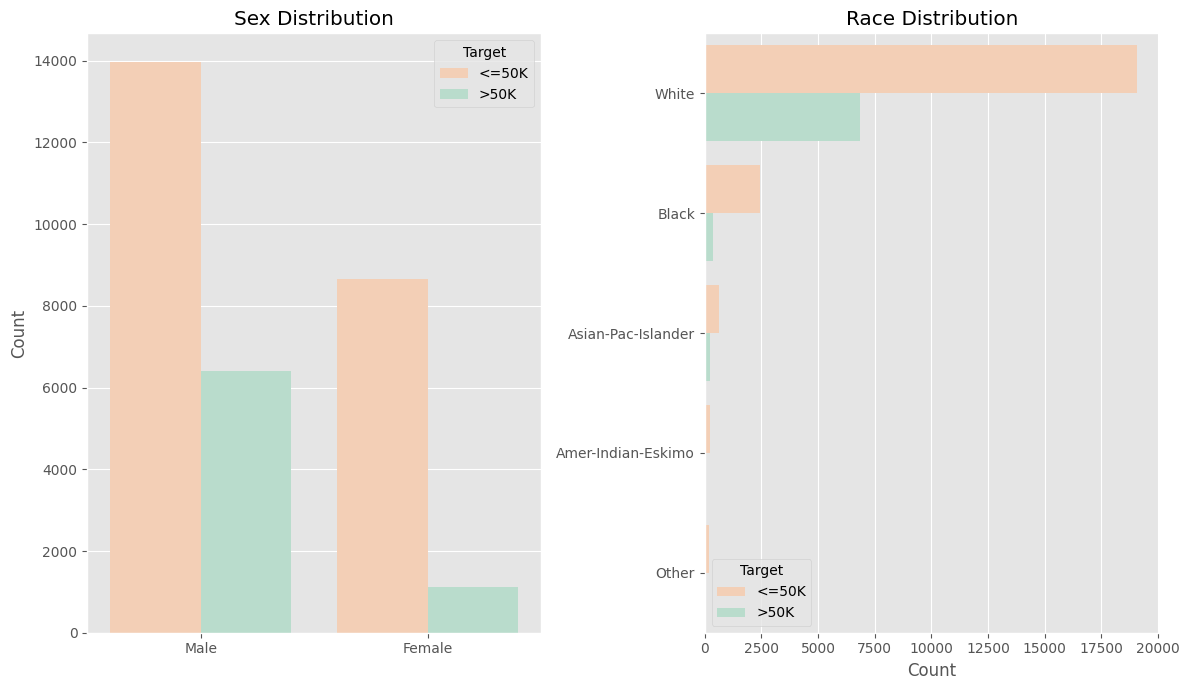

In [357]:
# Features: Sex and Race

custom_palette = {'>50K': '#b3e2cd', '<=50K': '#fdcdac'}
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

# First subplot
sns.countplot(df, x='Sex', ax=ax1, hue='Target', palette=custom_palette)
ax1.set_title('Sex Distribution')
ax1.set_ylabel('Count')
ax1.set_xlabel('')

# Second subplot
sns.countplot(df, y='Race', ax=ax2, hue='Target', palette=custom_palette)
ax2.set_title('Race Distribution')
ax2.set_ylabel('')
ax2.set_xlabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

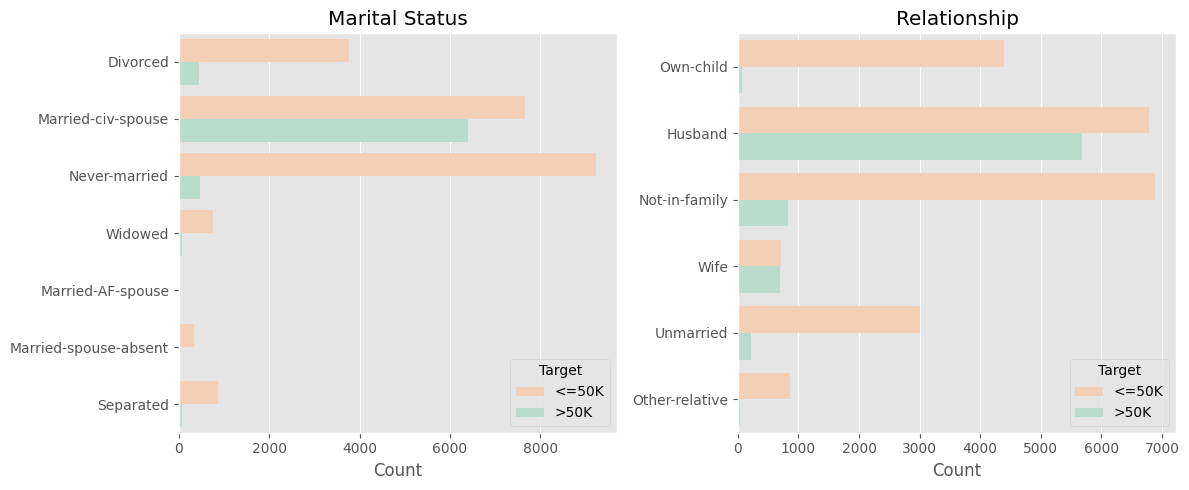

In [358]:
# Features: Maritial Status and Relationship
custom_palette = {'>50K': '#b3e2cd', '<=50K': '#fdcdac'}
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# First subplot
sns.countplot(df, y='Marital Status', ax=ax1, hue='Target', palette=custom_palette)
ax1.set_title('Marital Status')
ax1.set_ylabel('')
ax1.set_xlabel('Count')

# Second subplot
sns.countplot(df, y='Relationship', ax=ax2, hue='Target', palette=custom_palette)
ax2.set_title('Relationship')
ax2.set_ylabel('')
ax2.set_xlabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

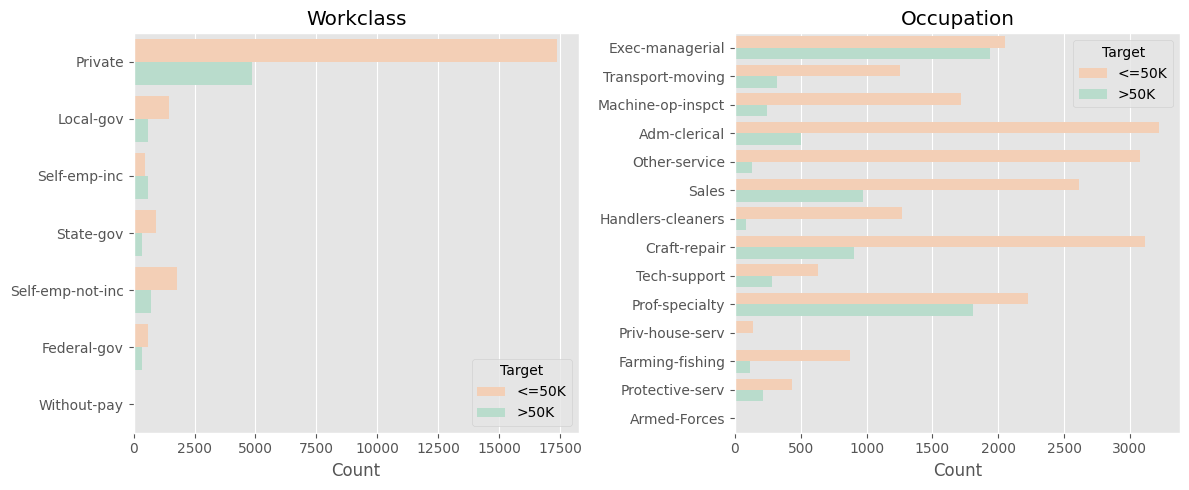

In [359]:
# Features: Maritial Status and Relationship
custom_palette = {'>50K': '#b3e2cd', '<=50K': '#fdcdac'}
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# First subplot
sns.countplot(df, y='Workclass', ax=ax1, hue='Target', palette=custom_palette)
ax1.set_title('Workclass')
ax1.set_ylabel('')
ax1.set_xlabel('Count')

# Second subplot
sns.countplot(df, y='Occupation', ax=ax2, hue='Target', palette=custom_palette)
ax2.set_title('Occupation')
ax2.set_ylabel('')
ax2.set_xlabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

#### First Insights
- This dataset is unbalanced, with 3/4 individuals with income below 50K and 1/4 above 50K
- The average age of people who have an income above 50k is approximately 44 years old;
- According to data, white, male and US-born individuals frequently have a higher income;
- Among those who have an income above 50k, married individuals prevail;
- Race and Native Country features are fragmented;
#### Questions / Actions
- Are Marital Status and Relationship redundant features?
- Are Education Number and Education equivalent?
- Are Capital Gain and Capital Loss inversely equivalent?
- Is Final Weight irrelevant for income prediction?
- Age, Final Weight and Hours per Week can be normalized
- Turn sex, race, native country and target (income) into binary (0 or 1) categories
- Workclass seems to be irrelevant as almost every individual is from Private workclass and the proportion of income is the same (3/4 below 50K)


### 1.4 Feature Engineering

We'll turn categorical features into numerical ones so we can analyze the correlation between all features. As we observed, Race and Native Country can be binary categorized as there's a huge imbalance of data. Also, Sex and the Target (income) are binary by nature.

In [360]:
def race_feat(race):
    if race == 'White':
        return 1
    else:
        return 0
    
def country_feat(country):
    if country == 'United-States':
        return 1
    else:
        return 0
    
def sex_feat(sex):
    if sex == 'Male':
        return 1
    else:
        return 0
    
def income_feat(income):
    if income == '>50K':
        return 1
    else:
        return 0

In [361]:
# Apply binary categorization
df['Race'] = df['Race'].apply(race_feat)
df['Native Country'] = df['Native Country'].apply(country_feat)

In [362]:
df['Sex'] = df['Sex'].apply(sex_feat)
df['Target'] = df['Target'].apply(income_feat)

In [363]:
df.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Target
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,1,1,0,0,44,1,0
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,1,1,0,0,40,1,0
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,1,1,0,0,42,1,0
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,1,0,0,0,40,1,0
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,1,1,5178,0,60,0,1


The Education feature can be transformed into an ordered numerical sequence:

In [364]:
df['Education'].unique()

array(['Some-college', '10th', 'HS-grad', 'Bachelors', 'Assoc-acdm',
       '5th-6th', 'Masters', '12th', 'Prof-school', 'Doctorate', '9th',
       '1st-4th', '7th-8th', 'Assoc-voc', '11th', 'Preschool'],
      dtype=object)

In the following order:
1. Preschool
2. 1st-4th
3. 5th-6th
4. 7th-8th
5. 9th
6. 10th
7. 11th
8. 12th
9. HS-grad (High School Graduate)
10. Some-college (Some College, but no degree)
11. Assoc-voc (Associate degree in vocational program)
12. Assoc-acdm (Associate degree in academic program)
13. Bachelors (Bachelor’s degree)
14. Masters (Master’s degree)
15. Prof-school (Professional school degree, e.g., law, medicine)
16. Doctorate (Doctoral degree, Ph.D.)

In [365]:
def education_feat(education):
    if education == 'Preschool':
        return 1
    elif education == '1st-4th':
        return 2
    elif education == '5th-6th':
        return 3
    elif education == '7th-8th':
        return 4
    elif education == '9th':
        return 5
    elif education == '10th':
        return 6
    elif education == '11th':
        return 7
    elif education == '12th':
        return 8
    elif education == 'HS-grad':
        return 9
    elif education == 'Some-college':
        return 10
    elif education == 'Assoc-voc':
        return 11
    elif education == 'Assoc-acdm':
        return 12
    elif education == 'Bachelors':
        return 13
    elif education == 'Masters':
        return 14
    elif education == 'Prof-school':
        return 15
    elif education == 'Doctorate':
        return 16

In [366]:
df['Education'] = df['Education'].apply(education_feat)

In [367]:
df.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Target
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,10,10,Divorced,Exec-managerial,Own-child,1,1,0,0,44,1,0
16281,58,Local-gov,310085,6,6,Married-civ-spouse,Transport-moving,Husband,1,1,0,0,40,1,0
16282,25,Private,146117,10,10,Never-married,Machine-op-inspct,Not-in-family,1,1,0,0,42,1,0
16283,24,Private,138938,10,10,Divorced,Adm-clerical,Not-in-family,1,0,0,0,40,1,0
16284,57,Self-emp-inc,258883,9,9,Married-civ-spouse,Transport-moving,Husband,1,1,5178,0,60,0,1


The other non-binary categorical features can be encoded with LabelEncoder

In [368]:
from sklearn.preprocessing import LabelEncoder

# Columns to be encoded
label_encode_cols = ['Workclass','Marital Status', 'Occupation', 'Relationship']

# LabelEncoder
label_encoder = LabelEncoder()
for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [369]:
df.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Target
Id,,,,,,,,,,,,,,,
16280,34,2,204991,10,10,0,3,3,1,1,0,0,44,1,0
16281,58,1,310085,6,6,2,13,0,1,1,0,0,40,1,0
16282,25,2,146117,10,10,4,6,1,1,1,0,0,42,1,0
16283,24,2,138938,10,10,0,0,1,1,0,0,0,40,1,0
16284,57,3,258883,9,9,2,13,0,1,1,5178,0,60,0,1


As we are using kNN, we must normalize the numerical features as those classifiers are sensitive to the scale of the data. These algorithms calculate distances or optimize based on numerical values, so it's important to bring all features to a similar scale. We'll use Min-Max Normalization
$$X_{norm} = \cfrac{X - X_{min}}{X_{max}-X_{min}}$$

In [370]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['Age', 'Workclass', 'Final Weight','Education', 'Education Number', 'Marital Status', 'Occupation', 'Relationship', 'Capital Gain', 'Capital Loss', 'Hours per Week']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [371]:
df.head()

,Age,Workclass,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Target
Id,,,,,,,,,,,,,,,
16280,0.232877,0.333333,0.130000,0.600000,0.600000,0.000000,0.230769,0.6,1,1,0.000000,0.0,0.438776,1,0
16281,0.561644,0.166667,0.201447,0.333333,0.333333,0.333333,1.000000,0.0,1,1,0.000000,0.0,0.397959,1,0
16282,0.109589,0.333333,0.089975,0.600000,0.600000,0.666667,0.461538,0.2,1,1,0.000000,0.0,0.418367,1,0
16283,0.095890,0.333333,0.085095,0.600000,0.600000,0.000000,0.000000,0.2,1,0,0.000000,0.0,0.397959,1,0
16284,0.547945,0.500000,0.166638,0.533333,0.533333,0.333333,1.000000,0.0,1,1,0.051781,0.0,0.602041,0,1


### 1.5 Feature Selection

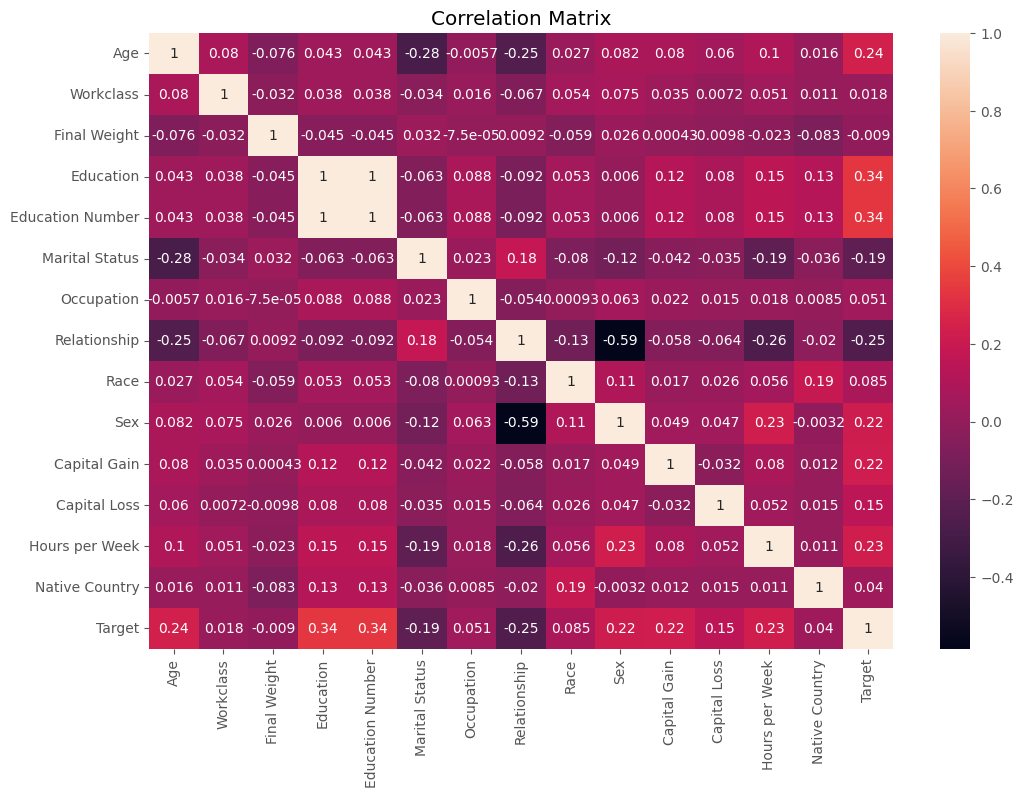

In [372]:
df_corr = df.corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix')
sns.heatmap(df_corr, annot=True)
plt.show()

In [373]:
# Correlation of features with target
correlation_with_target = df.corr()['Target'].sort_values(ascending=False)
print(correlation_with_target)

Target              1.000000
Education           0.335444
Education Number    0.335444
Age                 0.242019
Hours per Week      0.229435
Capital Gain        0.221208
Sex                 0.216684
Capital Loss        0.150023
Race                0.084789
Occupation          0.051450
Native Country      0.039946
Workclass           0.018088
Final Weight       -0.009012
Marital Status     -0.193390
Relationship       -0.251033
Name: Target, dtype: float64


Feature Selection
- Education and Education encodes the same information, so we can exclude one of them;
- Native Country and Race has low correlation with Target, so we can exclude it;
- As we suspected, workclass has low correlation with Target, as it's category is mainly 'Private' and it is in the same proportions of income.
- The 'Final Weight' represents the sampling weight assigned to each individual in the dataset, reflecting the number of people in the population that each data point is meant to represent in a survey or study. This is useful for certain kinds of demographic analysis, but irrelevant for predicting income.
So this feature must be excluded as it could be adding noise and increasing the dimensionality and this negatively impacts the model’s ability to generalize.

In [374]:
# Create Features and Target for training
#X = df.drop(['Education Number', 'Final Weight','Workclass', 'Race', 'Native Country', 'Target'], axis=1)
X = df.drop(['Education Number', 'Native Country', 'Final Weight', 'Race', 'Target'], axis=1)
Y = df['Target']
X.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Sex,Capital Gain,Capital Loss,Hours per Week
Id,,,,,,,,,,
16280,0.232877,0.333333,0.600000,0.000000,0.230769,0.6,1,0.000000,0.0,0.438776
16281,0.561644,0.166667,0.333333,0.333333,1.000000,0.0,1,0.000000,0.0,0.397959
16282,0.109589,0.333333,0.600000,0.666667,0.461538,0.2,1,0.000000,0.0,0.418367
16283,0.095890,0.333333,0.600000,0.000000,0.000000,0.2,0,0.000000,0.0,0.397959
16284,0.547945,0.500000,0.533333,0.333333,1.000000,0.0,1,0.051781,0.0,0.602041


### 2. kNN Classifier

As we discussed before, dimensionality and scale can highly affect kNN performance, so we've already dealt with those issues in the last section.

Our features are:

In [375]:
X.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Sex,Capital Gain,Capital Loss,Hours per Week
Id,,,,,,,,,,
16280,0.232877,0.333333,0.600000,0.000000,0.230769,0.6,1,0.000000,0.0,0.438776
16281,0.561644,0.166667,0.333333,0.333333,1.000000,0.0,1,0.000000,0.0,0.397959
16282,0.109589,0.333333,0.600000,0.666667,0.461538,0.2,1,0.000000,0.0,0.418367
16283,0.095890,0.333333,0.600000,0.000000,0.000000,0.2,0,0.000000,0.0,0.397959
16284,0.547945,0.500000,0.533333,0.333333,1.000000,0.0,1,0.051781,0.0,0.602041


We'll be using the GridSearch to train many kNN classifiers with different k (here we're testing k:(1,30)). We use Cross Validation with a common 10-fold to validate our models.

In [376]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [377]:
# Initialize kNN classifier
knn = KNeighborsClassifier()


# Define the range of k values to test
parameter_grid = {'n_neighbors': range(5,36)}

# Use GridSearchCV to test different k values with cross-validation
grid_search = GridSearchCV(knn, parameter_grid, cv=10, scoring='accuracy')
grid_search.fit(X, Y)

# Take best k, with best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f'Best k: {best_k}')
print(f'Best cross-validation accuracy: {best_score}')

Best k: 24
Best cross-validation accuracy: 0.8376801940540339


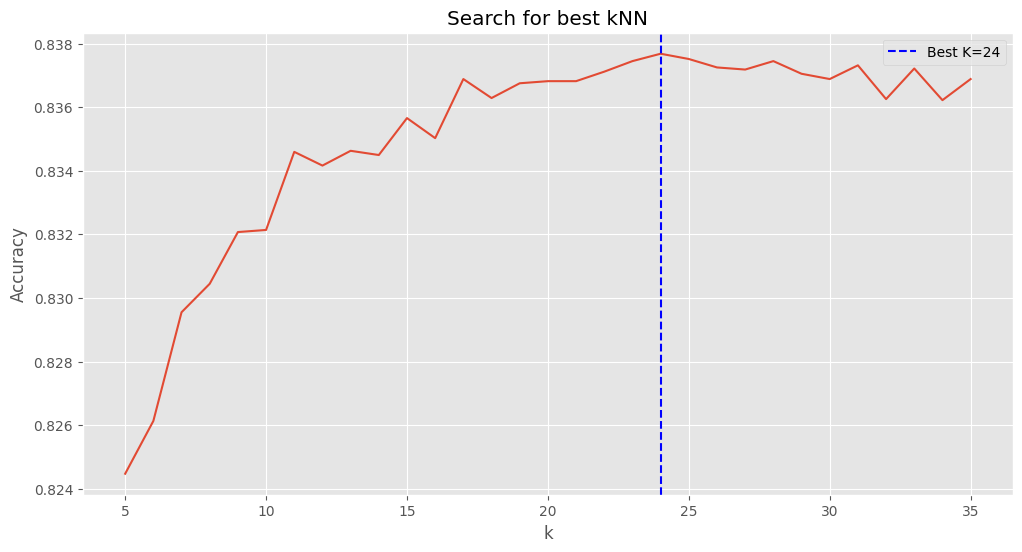

In [378]:
# Make a DataFrame of k and accuracies
search_results = grid_search.cv_results_
k_values = search_results['param_n_neighbors']
mean_test_accuracy = search_results['mean_test_score']
df_results = pd.DataFrame({'k': k_values, 'mean_test_accuracy': mean_test_accuracy})

# Plot
plt.figure(figsize=(12,6)) 
plt.plot(df_results['k'], df_results['mean_test_accuracy'])
plt.axvline(best_k, linestyle='--', label=f'Best K={best_k}', color='b')
plt.legend()
plt.title('Search for best kNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Knowing the best k, now we calculate other metrics to evaluate our model

In [379]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the oversampled dataset
knn = KNeighborsClassifier(n_neighbors=24)
mean_accuracy = cross_val_score(knn, X, Y, cv=10, scoring='accuracy').mean()
mean_precision = cross_val_score(knn, X, Y, cv=10, scoring='precision').mean()
mean_recall = cross_val_score(knn, X, Y, cv=10, scoring='recall').mean()
mean_f1 = cross_val_score(knn, X, Y, cv=10, scoring='f1').mean()

print("Mean CV Accuracy score:", mean_accuracy)
print("Mean CV Precision score:", mean_precision)
print("Mean CV Recall score:", mean_recall)
print("Mean CV F1-score:", mean_f1)


Mean CV Accuracy score: 0.8376801940540339
Mean CV Precision score: 0.7206756920077255
Mean CV Recall score: 0.5696800710164225
Mean CV F1-score: 0.6361229572560287


- Accuracy and precision are good, but recall and F1-score indicate that the model is missing a significant portion of the positive cases.
- This likely points to an issue with class imbalance, which is causing the model to underperform on the minority class.
- Tried oversampling, undersampling and doing both, but this lead to overfitting or underfitting, so we kept it as it is.

Now we train our model again, with our k=24 which was the best. 

Now that we validated our model with cross-validation, we fit our model with the entire training dataset and then make predictions with the test dataset.

In [380]:
df_test = pd.read_csv('data/test_data.csv')
df_test.set_index('Id', inplace=True)
df_test.rename(columns={'age': 'Age',
                   'workclass': 'Workclass',
                   'fnlwgt': 'Final Weight',
                   'education': 'Education',
                   'education.num': 'Education Number',
                   'marital.status': 'Marital Status',
                   'occupation': 'Occupation',
                   'relationship': 'Relationship',
                   'race': 'Race',
                   'sex': 'Sex',
                   'capital.gain': 'Capital Gain',
                   'capital.loss': 'Capital Loss',
                   'hours.per.week': 'Hours per Week',
                   'native.country': 'Native Country'
                   }, inplace=True)

# Apply binary categorization
df_test['Race'] = df_test['Race'].apply(race_feat)
df_test['Native Country'] = df_test['Native Country'].apply(country_feat)
df_test['Sex'] = df_test['Sex'].apply(sex_feat)
df_test['Education'] = df_test['Education'].apply(education_feat)

# Other categorical columns to be encoded
label_encode_cols = ['Workclass','Marital Status', 'Occupation', 'Relationship']

# LabelEncoder
label_encoder = LabelEncoder()
for col in label_encode_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])

# Normalize Data
# Select numerical columns for normalization
numerical_cols = ['Age', 'Workclass', 'Final Weight','Education', 'Education Number', 'Marital Status', 'Occupation', 'Relationship', 'Capital Gain', 'Capital Loss', 'Hours per Week']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

In [381]:
# Select Features
X_test = df_test.drop(['Education Number', 'Native Country', 'Final Weight', 'Race'], axis=1)

# Fit the model on the entire training dataset
knn.fit(X, Y)

# Predictions on the test dataset
Y_pred = knn.predict(X_test)

# Create DataFrame
Y_pred_df = pd.DataFrame({
                            'Id': X_test.index,
                            'income': Y_pred})
Y_pred_df.set_index('Id', inplace=True)
Y_pred_df.head()

,income
Id,
0,0
1,1
2,0
3,0
4,1


In [382]:
def translate_Y(y):
    if y == 1:
        return '>50K'
    else:
        return '<=50K'

In [383]:
Y_pred_df['income'] = Y_pred_df['income'].apply(translate_Y)
Y_pred_df.head()

,income
Id,
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,>50K


In [384]:
Y_pred_df.to_csv('data/submission.csv')